In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torch torchvision
import cv2
import torch
from torchvision.transforms import functional as F
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import os
from PIL import Image

In [ ]:
image_frames_dir = '/content/drive/My Drive/image_frames'


In [ ]:
input_file = '/content/drive/MyDrive/Colab Notebooks/inputvideo_road.MOV'

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [ ]:
import cv2

vidcap = cv2.VideoCapture(input_file)
success, image = vidcap.read()
count = 0
frames_to_extract = 50

while success and count < frames_to_extract:
    cv2.imwrite(f"{image_frames_dir}/frame{count:03d}.jpg", image)     # Save frame as JPEG file
    success, image = vidcap.read()
    count += 1

print(f"Extracted {count} frames.")


Extracted 50 frames.


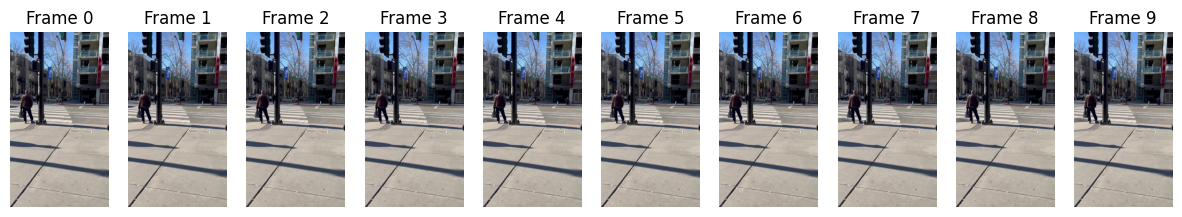

In [ ]:
# Number of frames to display
num_frames_to_show = 10

# Get all frame filenames
frame_files = sorted([os.path.join(image_frames_dir, f) for f in os.listdir(image_frames_dir) if f.endswith('.jpg')])

# Select a subset of frames to display
selected_frames = frame_files[:num_frames_to_show]

# Display the frames
plt.figure(figsize=(15, 10))
for i, frame_path in enumerate(selected_frames):
    plt.subplot(1, num_frames_to_show, i + 1)
    frame = Image.open(frame_path)
    plt.imshow(frame)
    plt.title(f'Frame {i}')
    plt.axis('off')
plt.show()

In [ ]:
import cv2
import os

# Open the video file
video_path = r"/content/drive/MyDrive/Colab Notebooks/inputvideo_road.MOV"
cap = cv2.VideoCapture(video_path)

# Define the output folder to save frames
output_folder = r"/content/drive/MyDrive/Colab Notebooks/Output_video"

# Define the frame rate (frames per second) to capture frames
frame_rate = 5  # Consider 5 frames per second

# Define the duration of the video to be considered (in seconds)
video_duration = 5  # Consider 5 seconds of the video

# Initialize variables
frame_count = 0
total_frames = int(cap.get(cv2.CAP_PROP_FPS) * video_duration)

# Loop through the video frames
while cap.isOpened() and frame_count < total_frames:
    ret, frame = cap.read()

    if not ret:
        break

    # Save the frame to the output folder
    cv2.imwrite(os.path.join(output_folder, f'frame_{frame_count}.jpg'), frame)

    # Skip frames based on frame rate
    frames_to_skip = int(cap.get(cv2.CAP_PROP_FPS)) // frame_rate
    for _ in range(frames_to_skip - 1):
        cap.read()

    frame_count += 1

# Release the video capture object
cap.release()